In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [2]:
df = pd.read_csv('Enumerated dataset.csv')
df.head()

,Age,Education level,Number of use Internet and Internet-related services,Internet/ Digital devices skills level,Secure of person's digital devices,Legitimacy of a website,Password with personal information,Aware of the danger of clicking pop-up screens,Attention to person's account privacy,Protection of social media services for personal info,...,blogs1,etc.1,Government websites (e.g. CERT)1,I do not feel that I keep myself updated1,Rely on automatic updates1,Internet service provider ISPs1,Other- Messages from Communication Company1,Others: Twitter1,Other- Twitter1,etc..1
0,0,3,2,1,3,4,0,4,4,2,...,1,1,0,0,0,0,0,0,0,0
1,0,2,2,1,4,0,4,4,4,3,...,1,1,0,0,0,0,0,0,0,0
2,0,2,2,1,4,3,3,4,4,3,...,1,1,0,0,0,0,0,0,0,0
3,0,2,2,1,4,2,0,3,1,3,...,1,1,0,0,0,0,0,0,0,0
4,0,2,2,1,4,3,1,4,3,2,...,1,1,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1213, 224)

In [4]:
# Checking the correlation for the data of our target ( Victim of cybercrime )
#The dataset contain too many columns, correlation map will not be useful

df.corrwith(df["Victim of cybercrime"]).sort_values( ascending=False)

Victim of cybercrime                                                                                 1.000000
Bank                                                                                                 0.145149
Online personal information is not secure enough                                                     0.135610
No one                                                                                               0.109586
Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime    0.105763
                                                                                                       ...   
I don't know.1                                                                                      -0.086462
Don’t know but will ask my friends for advice                                                       -0.106505
Well protected against cybercrime                                                                   -0.106858
Laws are e

In [5]:
# Finding the best features to use for the traning and store it

corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)

# pick the best 20 columns. 10 from the top and 10 from the last
first10=corrArray[1:11]
first10= list(first10.index)
first10

['Bank',
 'Online personal information is not secure enough',
 'No one',
 'Responsibility of those offering online/Internet-based servicesin raising awareness of cybercrime',
 'Education level',
 'Role of the government in combating cybercrimes_No role',
 'Apple store',
 'Education',
 'Government or professional reports',
 'PIN)']

In [6]:
# Finding the best features to use for the traning and store it

corrArray=df.corrwith(df['Victim of cybercrime']).sort_values( ascending=False)

# pick the best 20 columns. 10 from the top and 10 from the last
last10=corrArray[-10:]
last10= list(last10.index)
last10

['Legitimacy of a website',
 'Role of the government in combating cybercrimes_Have stricter laws and punishments for cyber crimes',
 'Concerned about encountering material promotes hatred or religious extremism',
 'Concerned about receiving phishing emails',
 'I do not feel that I keep myself updated',
 "I don't know.1",
 'Don’t know but will ask my friends for advice',
 'Well protected against cybercrime',
 'Laws are effective in managing the cybercrime problem',
 'Report cybercrime']

## PCA

In [7]:
# Selecting features
# Save X data
X = df[first10 + last10]

# Encode our target
le = LabelEncoder()
y = le.fit_transform(df['Victim of cybercrime'])

In [8]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [9]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [10]:
# components
pca.components_

array([[ 1.49113008e-03,  1.66236843e-02, -6.54206322e-04,
        -6.70483387e-02,  7.65163109e-02,  1.49220217e-03,
         3.70410746e-03,  5.83016286e-02,  1.94182279e-02,
         4.46505849e-02, -3.21708697e-01, -6.70398906e-02,
         8.11566422e-02,  9.74230847e-02,  5.07565168e-02,
        -5.48427035e-03,  4.47694242e-02, -6.94007529e-01,
        -6.07927376e-01, -6.06940637e-02],
       [ 1.42541741e-03, -7.33989225e-01, -1.08632001e-03,
        -3.56877681e-01, -5.03301488e-02, -2.10362311e-03,
        -3.87058318e-03, -7.84080625e-02, -7.19639070e-02,
        -2.36713687e-02, -2.23523496e-01, -2.14844184e-02,
         2.96054897e-01,  2.83089907e-01,  7.58442277e-02,
         3.89506711e-02,  2.49436137e-02,  2.80505957e-01,
        -1.10448917e-01,  4.96836187e-02],
       [-2.28859737e-03, -3.98181918e-01,  2.79739477e-03,
         2.89745455e-01,  1.22194305e-01,  1.74608324e-02,
         4.50153183e-03,  7.62692297e-02,  1.68028739e-01,
         1.09974036e-01,  5.4

In [11]:
pd.Series(pca.explained_variance_ratio_) 

0     0.202138
1     0.162117
2     0.106687
3     0.085758
4     0.082566
5     0.068185
6     0.047992
7     0.043136
8     0.036431
9     0.029964
10    0.028262
11    0.027105
12    0.021593
13    0.020527
14    0.015046
15    0.014450
16    0.006671
17    0.000745
18    0.000372
19    0.000254
dtype: float64

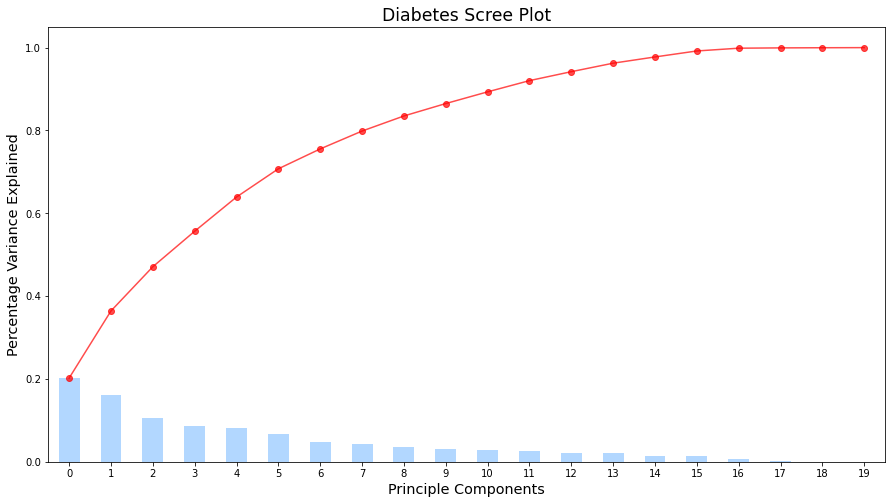

In [12]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,8))

exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'red' ) #plot line chart of increasing variances

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [13]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [16]:
# Fit PCA
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

# Created two model to compare training time
logreg_noPCA = LogisticRegression(max_iter=1230) # Set max_iter so model reaches convergence

logreg = LogisticRegression()

In [17]:
# Measure how long it takes to train WITHOUT PCA

print('Measure how long it takes to train WITHOUT PCA')
%timeit logreg_noPCA.fit(X_train, y_train)

print()

# Measure how long it takes to train with PCA

print('Measure how long it takes to train WITH PCA')
%timeit logreg.fit(X_train_pca, y_train)

Measure how long it takes to train WITHOUT PCA
13.5 ms ± 44.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Measure how long it takes to train WITH PCA
3.92 ms ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
# PCA Model
print('PCA Training accuracy:',logreg.score(X_train_pca, y_train)) 
print('PCA Testing accuracy:', logreg.score(X_test_pca, y_test))

PCA Training accuracy: 0.9350515463917526
PCA Testing accuracy: 0.9259259259259259


## KMeans

In [ ]:
df1 = df[['Report cybercrime', 'Victim of cybercrime', 'Bank']]

In [ ]:
X = df.iloc[:,[0,1]].values
X

In [ ]:
y= df[['Victim of cybercrime']]
y

In [ ]:
X1 =df.drop('Victim of cybercrime',axis=1)
X1

In [ ]:
# Initial EDA to determine possible number of clusters in our data "customer groups"

plt.scatter(X[:,0], X[:,1])

plt.xlabel('Report cybercrime')
plt.ylabel('Victim of cybercrime')
plt.title('Report vs victim of cybercrime')
plt.show()

### Elbow Graph

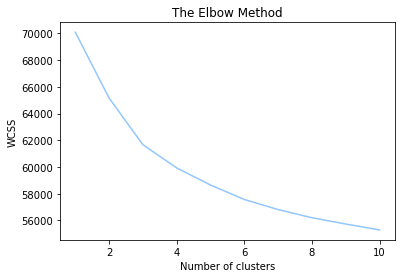

In [21]:
# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

wcss = []
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the plot we can see that the optimal number of clusters in 3  

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

y_kmeans = kmeans.fit_predict(X1)

In [ ]:
y_kmeans

In [ ]:
# This prints the Report cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 0])

print('\n')

# This prints the sVictim of cybercrime in the 1st cluster --> cluster 0
print (X[y_kmeans == 0, 1])

In [ ]:
# Cluster centeriods

print (kmeans.cluster_centers_)

In [ ]:
# The Report cybercrime for the centriods
print (kmeans.cluster_centers_[:, 0])

# The Victim of cybercrime for the centriods
print (kmeans.cluster_centers_[:, 1])

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')

#plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.title('Clusters of Victims')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
#print (np.where(y_kmeans ==0 )[0])

# KMeans

In [19]:
df1 = df.copy()

X1= df1.drop('Victim of cybercrime',axis=1)


kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(X1)

df1['Cluster'] = y

print(df1.head())

   Age  Education level  Number of use Internet and Internet-related services  \
0    0                3                                                  2      
1    0                2                                                  2      
2    0                2                                                  2      
3    0                2                                                  2      
4    0                2                                                  2      

   Internet/ Digital devices skills level  Secure of person's digital devices  \
0                                       1                                   3   
1                                       1                                   4   
2                                       1                                   4   
3                                       1                                   4   
4                                       1                                   4   

   Legitimacy of a website

<AxesSubplot:xlabel='component1', ylabel='component2'>

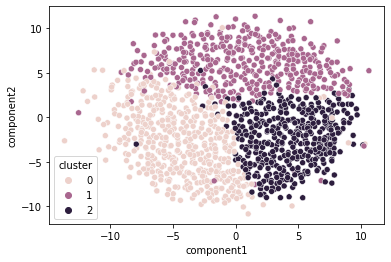

In [20]:

embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(df1.drop(['Cluster','Victim of cybercrime'],axis=1)),
             columns = ['component1','component2'])
mds['cluster'] = df1['Cluster'] 

sns.scatterplot(data=mds,x = "component1",y="component2",hue="cluster")